## BUSINESS CASE 

RUNNING A HYDRAULIC MOTAR AND MONITORING ITS VIBRATIONS, TEMPERATURE AND OTHER DATA. SUCH THAT THE PROBLEMS ARISE IN THE MOTAR AND TO KNOW WHERE THE PROBLEM LIES.

In [1]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#IMPORTING DATASET 
a=[]
for i in ["PS1","PS2","PS3","PS4","PS5","PS6","EPS1","FS1","FS2","TS1","TS2","TS3","TS4","VS1","CE","CP","SE"]:
    data=np.genfromtxt(r"C:\Users\A\Desktop\New folder (2)\New folder"+"/"+i+".txt")
    a.append(data)
ps1,ps2,ps3,ps4,ps5,ps6,eps1,fs1,fs2,ts1,ts2,ts3,ts4,vs1,ce,cp,se=a

In [3]:
#CREATED AVERAGE OF THE DATA
ps1_arr=ps1.mean(axis=1)
ps2_arr=ps2.mean(axis=1)
ps3_arr=ps3.mean(axis=1)
ps4_arr=ps4.mean(axis=1)
ps5_arr=ps5.mean(axis=1)
ps6_arr=ps6.mean(axis=1)
eps1_arr=eps1.mean(axis=1)
fs1_arr=fs1.mean(axis=1)
fs2_arr=fs2.mean(axis=1)
ts1_arr=ts1.mean(axis=1)
ts2_arr=ts2.mean(axis=1)
ts3_arr=ts3.mean(axis=1)
ts4_arr=ts4.mean(axis=1)
vs1_arr=vs1.mean(axis=1)
ce_arr=ce.mean(axis=1)
cp_arr=cp.mean(axis=1)
se_arr=se.mean(axis=1)

In [4]:
#CREATING A DATAFRAME
df1 = pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr,
                   "EPS1":eps1_arr,"FS1":fs1_arr,"FS2":fs2_arr,
                  "TS1":ts1_arr,"TS2":ts2_arr,"TS3":ts3_arr,"TS4":ts4_arr,"VS1":vs1_arr,"CE":ce_arr,"CP":cp_arr,"SE":se_arr,})

In [5]:
#COLUMNS
df=df1
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [6]:
#IMPORTING TARGET
target = np.genfromtxt(r"C:\Users\A\Desktop\New folder (2)\New folder\profile.txt")

df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_final=pd.concat([df,df_temp],axis=1)

In [7]:
df_final.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0


### CHECKING WHETHER MOTAR HAS PROBLEM

In [8]:
#USING PCA TO REDUCE COMPONENTS 
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca = pd.DataFrame({"PC1":df_pca[0],"PC2":df_pca[1]})

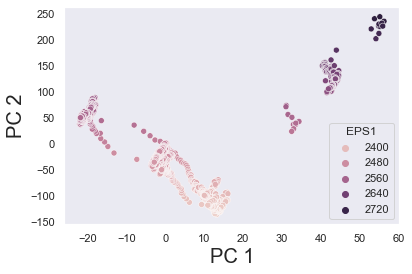

In [9]:
sns.set(style='dark')
ax=sns.scatterplot(data=df_pca,x='PC2',y='PC1',hue=df['EPS1'])
plt.xlabel("PC 1",fontsize =20)
plt.ylabel("PC 2",fontsize =20)
plt.show()

### UNIVARIATE ANALYSIS

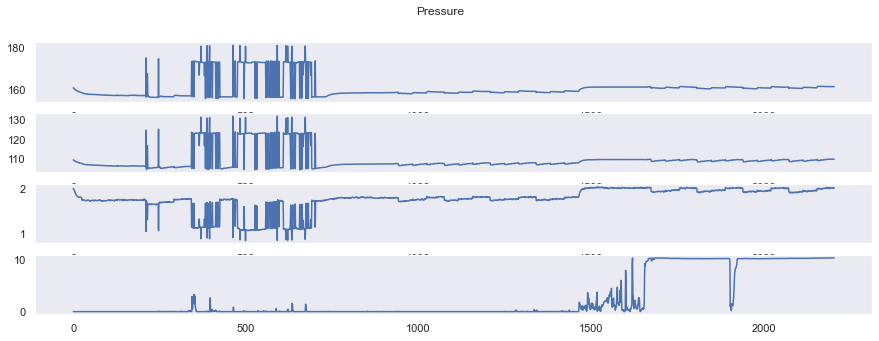

In [10]:
#LINE PLOT OF PRESSURES
fig, axs = plt.subplots(4, figsize=(15, 5))
fig.suptitle('Pressure')
axs[0].plot(df_final['PS1'])
axs[1].plot(df_final['PS2'])
axs[2].plot(df_final['PS3'])
axs[3].plot(df_final['PS4'])

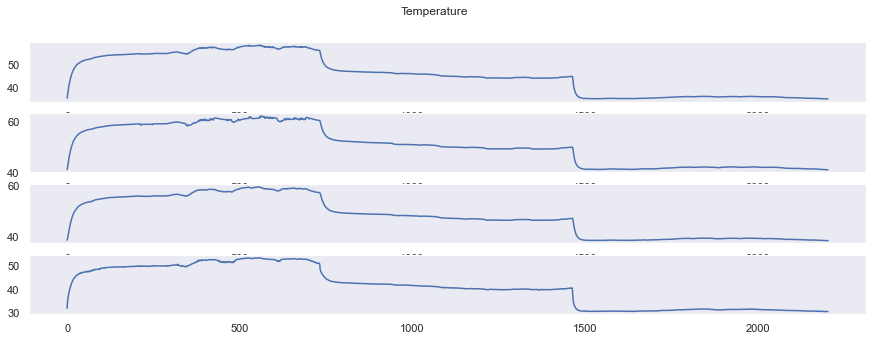

In [11]:
#LINE PLOT OF TEMPERATURE
fig, axs = plt.subplots(4, figsize=(15, 5))
fig.suptitle('Temperature')
axs[0].plot(df_final['TS1'])
axs[1].plot(df_final['TS2'])
axs[2].plot(df_final['TS3'])
axs[3].plot(df_final['TS4'])

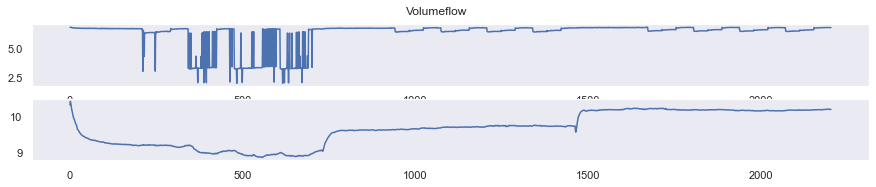

In [12]:
#VOLUME OF FLOW
fig, axs = plt.subplots(2, figsize=(15, 2.5))
fig.suptitle('Volumeflow')
axs[0].plot(df_final['FS1'])
axs[1].plot(df_final['FS2'])


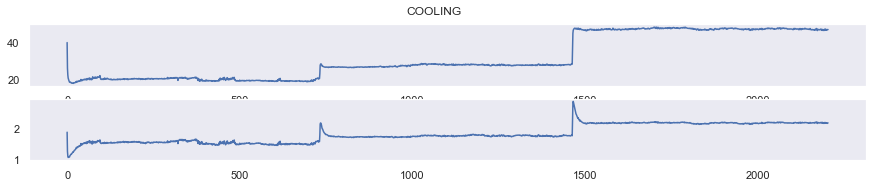

In [13]:
#COOLING VARIABLES
fig, axs = plt.subplots(2, figsize=(15, 2.5))
fig.suptitle('COOLING')
axs[0].plot(df_final['CE'])
axs[1].plot(df_final['CP'])

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='VS1', ylabel='EPS1'>

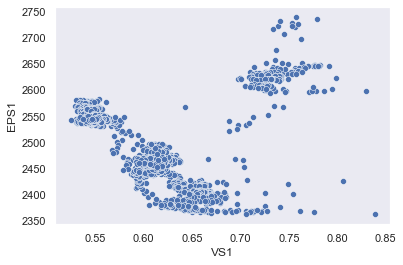

In [14]:
#SCATTERPLOT FOR MOTAR POWER VS VIBRATION
sns.scatterplot(data=df_final, x= df['VS1'],y=df['EPS1'])

<AxesSubplot:xlabel='SE', ylabel='EPS1'>

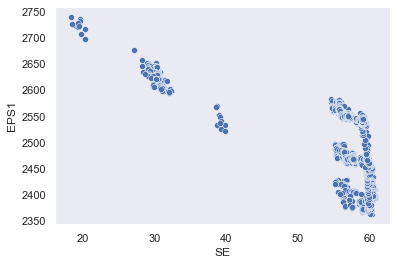

In [15]:
#SCATTERPLOT FOR EFFICIENCY VS MOTAR POWER
sns.scatterplot(data=df_final, x= df['SE'],y=df['EPS1'])

<AxesSubplot:xlabel='CP', ylabel='CE'>

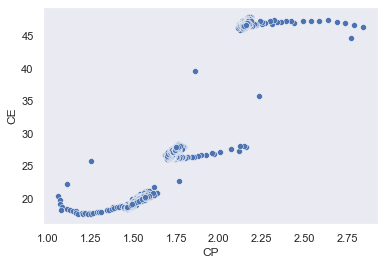

In [16]:
#PLOT OF COOLING EFFICIENCY VS COOLING POWER
sns.scatterplot(data=df_final, x= df['CP'],y=df['CE'])

### MULTIVARIATE ANLYSIS

<AxesSubplot:xlabel='FS1', ylabel='EPS1'>

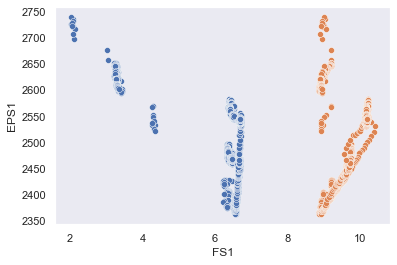

In [19]:
#SCATTER PLOT FOR ENGINE POWER VS VOLUME FLOW
sns.scatterplot(data=df_final, x= df['FS1'],y=df['EPS1'])
sns.scatterplot(data=df_final, x= df['FS2'],y=df['EPS1'])

<AxesSubplot:xlabel='TS1', ylabel='EPS1'>

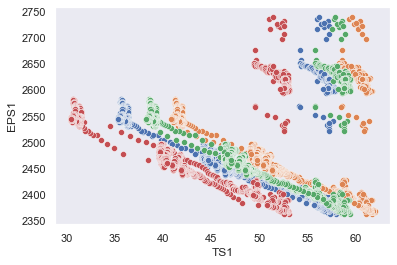

In [23]:
#SCATTERPLOT FOR ENGINE POWER VS TEMPERATURE
sns.scatterplot(data=df_final, x= df['TS1'],y=df['EPS1'])
sns.scatterplot(data=df_final, x= df['TS2'],y=df['EPS1'])
sns.scatterplot(data=df_final, x= df['TS3'],y=df['EPS1'])
sns.scatterplot(data=df_final, x= df['TS4'],y=df['EPS1'])

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   EPS1                   2205 non-null   float64
 7   FS1                    2205 non-null   float64
 8   FS2                    2205 non-null   float64
 9   TS1                    2205 non-null   float64
 10  TS2                    2205 non-null   float64
 11  TS3                    2205 non-null   float64
 12  TS4                    2205 non-null   float64
 13  VS1                    2205 non-null   float64
 14  CE                     2205 non-null   float64
 15  CP  

<AxesSubplot:>

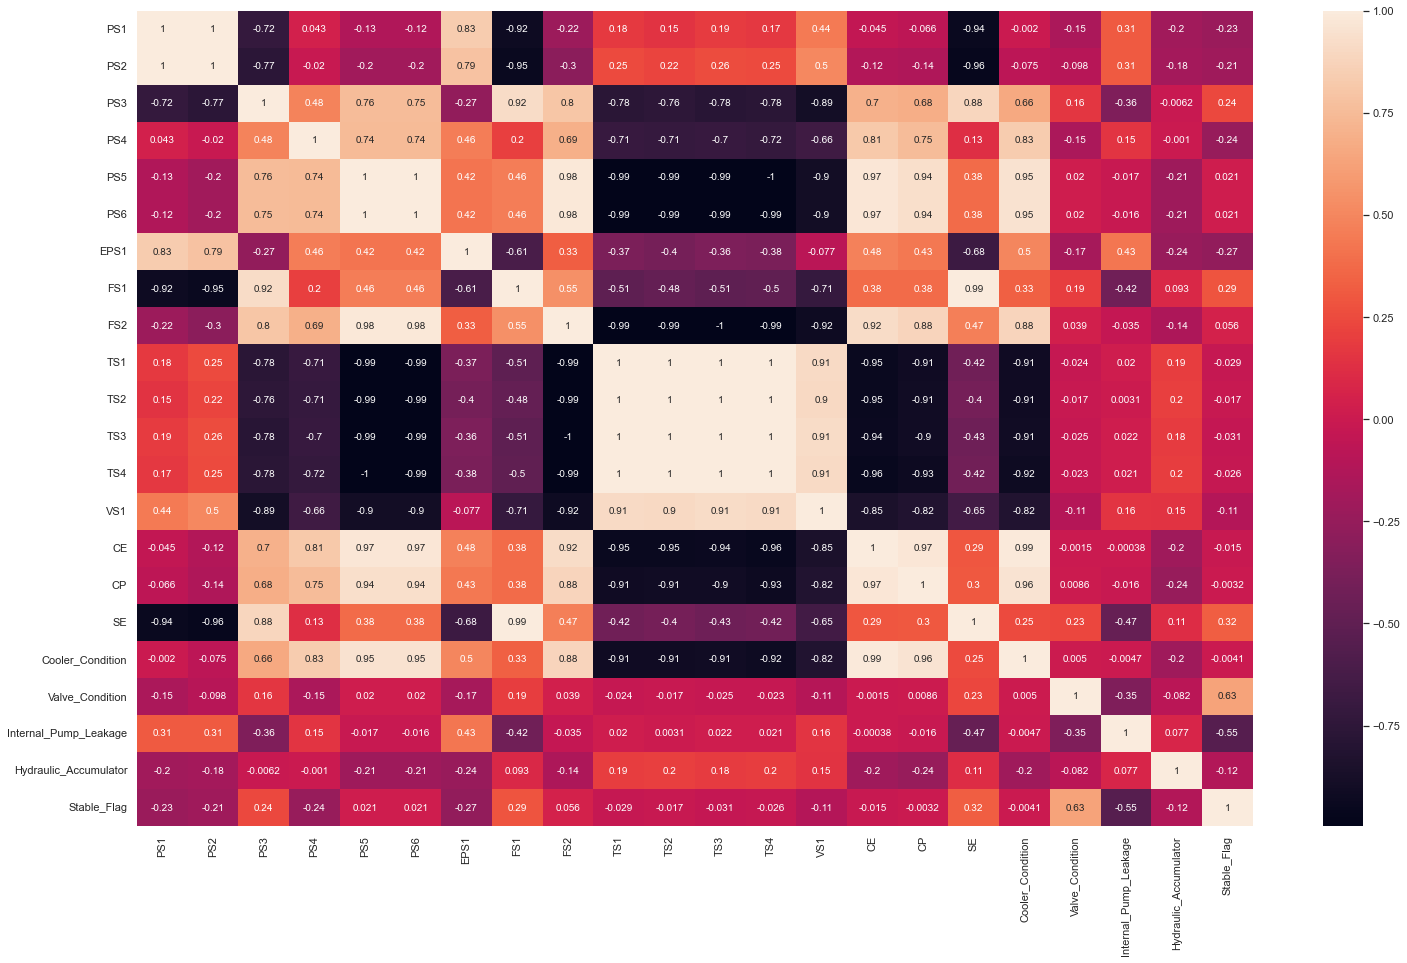

In [25]:
#CORRELATION
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

In [26]:
df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
Cooler_Condition,-0.002000,-0.075386,0.662852,0.832446,0.949962,0.950316,0.497514,0.330446,0.881340,-0.910865,...,-0.922572,-0.818256,0.991943,0.956220,0.249273,1.000000,0.004952,-0.004656,-0.203954,-0.004105
CE,-0.044862,-0.119934,0.697820,0.814459,0.973995,0.974220,0.475030,0.376376,0.919353,-0.945977,...,-0.955987,-0.852222,1.000000,0.974136,0.293130,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,-0.065850,-0.137819,0.680701,0.752728,0.936972,0.937112,0.433904,0.382178,0.876955,-0.912048,...,-0.926772,-0.821073,0.974136,1.000000,0.303047,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458


In [27]:
#LABEL DATA
df_target = df_final.iloc[:,17:22]
df_train = df_final.iloc[:,0:17]

In [28]:
df_target

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...
2200,100.0,100.0,0.0,90.0,0.0
2201,100.0,100.0,0.0,90.0,0.0
2202,100.0,100.0,0.0,90.0,0.0
2203,100.0,100.0,0.0,90.0,0.0


In [63]:
#SCALING DATA
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scale = scale.fit_transform(df_train)

In [64]:
#SPLITTING DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scale,df_target, test_size=0.2, random_state=12)

### USING RANDOM FOREST CLASSIFER 

In [65]:
forest = RandomForestClassifier(random_state=1)
multi_target_class = MultiOutputClassifier(forest, n_jobs=-2)
multi_target_class = multi_target_class.fit(X_train,y_train)

In [66]:
y_pred = multi_target_class.predict(X_test)
print(accuracy_score(np.asarray(y_test).argmax(axis=1), y_pred.argmax(axis=1)))

0.9727891156462585


In [67]:
import pickle

In [68]:
pickle_out = open('motar_hydraulic.pkl','wb')
pickle.dump(multi_target_class, pickle_out)
loaded_model = pickle.load(open('motar_hydraulic.pkl','rb'))

In [69]:
result = loaded_model.score(X_test, y_test)
print(result)

0.9229024943310657


In [73]:
df_train.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [ ]:
#uvicorn app:app --reload